Librerias

In [35]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import pathlib

from google.colab import drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Imagenes

In [36]:
data_dir_str = "/content/drive/MyDrive/Proyecto_mangocateros/Proyecto_Mango/unidas/DosMngos"
data_dir = pathlib.Path(data_dir_str)

In [37]:
AFisiopatologias = (list(data_dir.glob('AEnfermo/*.JPG'))+
                   list(data_dir.glob('AEnfermo/*.jpg'))+
                   list(data_dir.glob('AEnfermo/*.png'))+
                   list(data_dir.glob('AEnfermo/*.jpeg')))

ASanas = (list(data_dir.glob('ASanos/*.JPG'))+
         list(data_dir.glob('ASanos/*.jpg'))+
         list(data_dir.glob('ASanos/*.png'))+
            list(data_dir.glob('ASanos/*.jpeg')))

TFisiopatologias = (list(data_dir.glob('TEnfermo/*.JPG'))+
                   list(data_dir.glob('TEnfermo/*.jpg'))+
                   list(data_dir.glob('TEnfermo/*.png'))+
                   list(data_dir.glob('TEnfermo/*.jpeg')))

TSanas = (list(data_dir.glob('TSanos/*.JPG'))+
         list(data_dir.glob('TSanos/*.jpg'))+
         list(data_dir.glob('TSanos/*.png'))+
            list(data_dir.glob('TSanos/*.jpeg')))

print(len(AFisiopatologias))
print(len(ASanas))
print(len(TFisiopatologias))
print(len(TSanas))

641
282
318
204


In [38]:
batch_size = 32 #Número de ejemplos que se pasan al algoritmo en cada iteración de aprendizaje
img_height = 200
img_width = 200

In [39]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=452,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 1445 files belonging to 4 classes.
Using 1156 files for training.


In [40]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=452,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 1445 files belonging to 4 classes.
Using 289 files for validation.


In [41]:
class_names = train_ds.class_names
print(class_names)

['AEnfermo', 'ASanos', 'TEnfermo', 'TSanos']


In [42]:
print(type(train_ds)) #lista de tuplas de forma (batch images, labels)
tensor1,labels1=next(iter(train_ds))

<class 'tensorflow.python.data.ops.prefetch_op._PrefetchDataset'>


In [43]:
print(tensor1) #Relaciones multilineales
print(labels1)

tf.Tensor(
[[[[224.97     224.97     216.97    ]
   [225.81     225.81     217.81    ]
   [226.7      226.7      218.7     ]
   ...
   [174.19994  168.19994  156.19994 ]
   [172.90999  166.90999  154.90999 ]
   [169.59996  163.59996  151.59996 ]]

  [[225.12     225.12     217.12    ]
   [222.13     222.13     214.13    ]
   [224.       224.       216.      ]
   ...
   [176.39993  170.39993  158.39993 ]
   [175.30005  169.30005  157.30005 ]
   [170.10004  164.10004  152.10004 ]]

  [[222.95     222.95     214.95    ]
   [223.6      223.6      215.6     ]
   [223.75     223.75     215.75    ]
   ...
   [175.       169.       157.      ]
   [176.34998  170.34998  158.34998 ]
   [170.60004  164.60004  152.60004 ]]

  ...

  [[143.04999  139.04999  128.04999 ]
   [140.7      136.7      125.7     ]
   [143.5      139.5      128.5     ]
   ...
   [188.24997  184.24997  173.24997 ]
   [184.5      180.5      169.5     ]
   [184.44998  180.44998  169.44998 ]]

  [[143.11996  139.11996  128.1199

AEnfermo


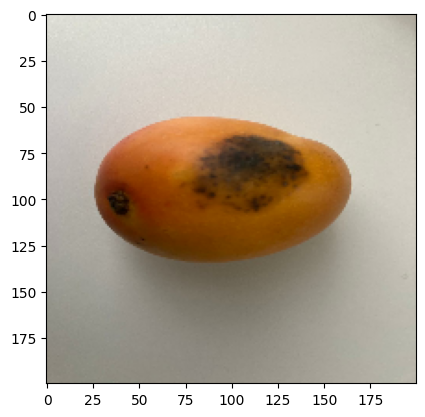

In [44]:
plt.imshow(tensor1[0].numpy().astype("uint8"))
print(class_names[labels1[0]])

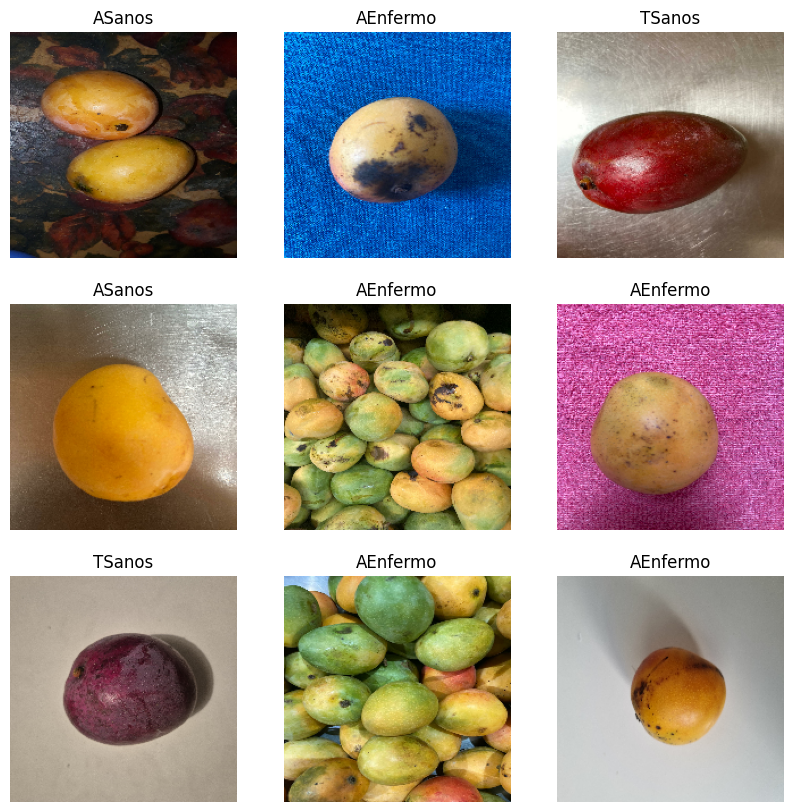

In [45]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8")) #uint8 array de enteros sin signo de 8bits.Inicia en 0
        plt.title(class_names[labels[i]])
        plt.axis("off")

0.0     1.0


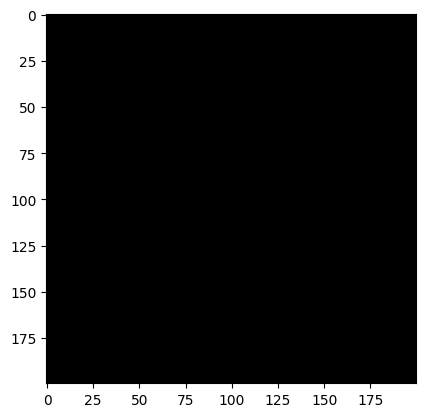

In [46]:
normalization_layer = layers.Rescaling(1./255)
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
print(np.min(first_image),'   ', np.max(first_image))
plt.imshow(first_image.numpy().astype("uint8"))

Configuración del dataset

In [47]:
AUTOTUNE = tf.data.AUTOTUNE #Corregir data?

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [48]:
num_classes = 4

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(140, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(64, activation='relu'),
  layers.Dense(num_classes)
])

In [49]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [50]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_3 (Rescaling)     (None, 200, 200, 3)       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 200, 200, 140)     3920      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 100, 100, 140)     0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 100, 100, 128)     161408    
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 50, 50, 128)       0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 320000)           

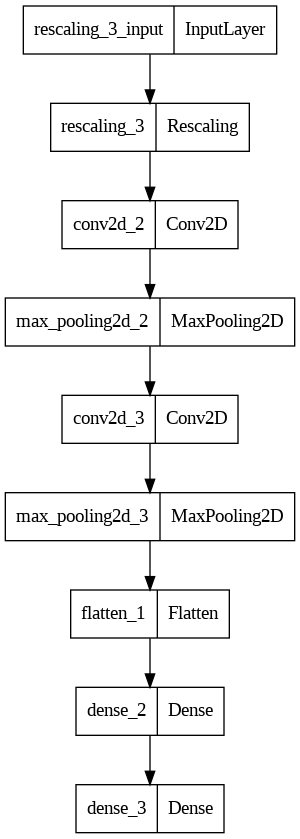

In [51]:
from keras.utils import plot_model

plot_model(model)

In [52]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

#Objeto tipo history: encapsula el string(secuencia de caracteres) que se muestra en un campo de historial de un registro de datos

Epoch 1/10
37/37 [==============================] - 532s 12s/step - loss: 2.5276 - accuracy: 0.4178 - val_loss: 0.8694 - val_accuracy: 0.6401
Epoch 2/10
37/37 [==============================] - 415s 11s/step - loss: 0.8757 - accuracy: 0.6185 - val_loss: 0.7093 - val_accuracy: 0.6678
Epoch 3/10
37/37 [==============================] - 416s 11s/step - loss: 0.6567 - accuracy: 0.7189 - val_loss: 0.6239 - val_accuracy: 0.7439
Epoch 4/10
37/37 [==============================] - 418s 11s/step - loss: 0.4384 - accuracy: 0.8149 - val_loss: 0.4383 - val_accuracy: 0.8097
Epoch 5/10
37/37 [==============================] - 429s 12s/step - loss: 0.3576 - accuracy: 0.8590 - val_loss: 0.5068 - val_accuracy: 0.8028
Epoch 6/10
37/37 [==============================] - 430s 12s/step - loss: 0.2778 - accuracy: 0.8789 - val_loss: 0.5486 - val_accuracy: 0.7889
Epoch 7/10
37/37 [==============================] - 415s 11s/step - loss: 0.1758 - accuracy: 0.9351 - val_loss: 0.4284 - val_accuracy: 0.8478
Epoch 

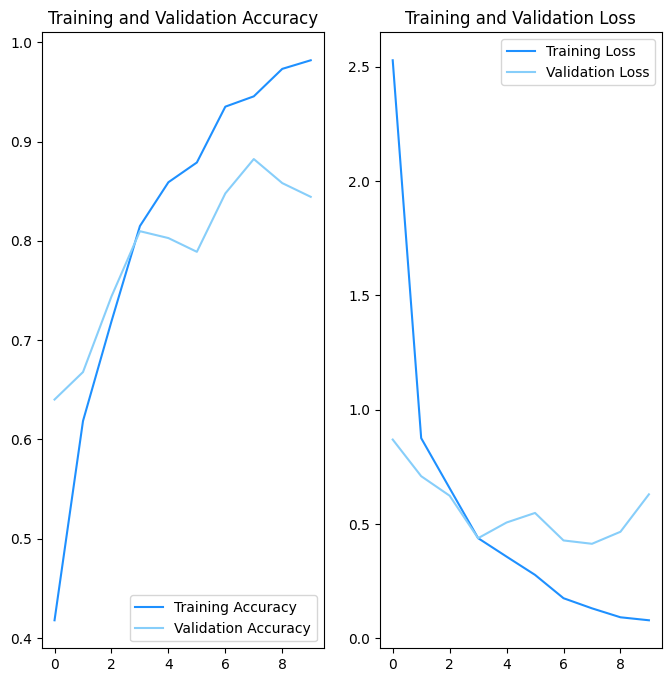

In [53]:
#history.history es un diccionario que contiene los valores de la función de perdida y las métricas escogidas para
#cada conjunto de datos y cada época como listas.

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy',c='dodgerblue')
plt.plot(epochs_range, val_acc, label='Validation Accuracy',c='lightskyblue')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss',c='dodgerblue')
plt.plot(epochs_range, val_loss, label='Validation Loss',c='lightskyblue')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [54]:
img1 = tf.keras.utils.load_img(
    '/content/drive/MyDrive/Carpeta_proyecto_mango_aguacate/Proyecto_Mango/Enfermedad.JPG', target_size=(img_height, img_width)
)
img2= tf.keras.utils.load_img(
    '/content/drive/MyDrive/Carpeta_proyecto_mango_aguacate/Proyecto_Mango/Insectos.png', target_size=(img_height, img_width)
)
img3 = tf.keras.utils.load_img(
    '/content/drive/MyDrive/Carpeta_proyecto_mango_aguacate/Proyecto_Mango/Sanos.jpeg', target_size=(img_height, img_width)
)

In [55]:
img_array1 = tf.keras.utils.img_to_array(img1)
img_array1 = tf.expand_dims(img_array1, 0) # Create a batch

predictions = model.predict(img_array1)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
) #Fisiopato

1/1 [==============================] - 0s 154ms/step
This image most likely belongs to TEnfermo with a 99.96 percent confidence.


In [56]:
img_array2 = tf.keras.utils.img_to_array(img2)
img_array2 = tf.expand_dims(img_array2, 0)

predictions = model.predict(img_array2)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
) #Insecto

1/1 [==============================] - 0s 118ms/step
This image most likely belongs to TEnfermo with a 99.71 percent confidence.


In [57]:
img_array3 = tf.keras.utils.img_to_array(img3)
img_array3 = tf.expand_dims(img_array3, 0) # Create a batch

predictions = model.predict(img_array3)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
) #Sano

1/1 [==============================] - 0s 102ms/step
This image most likely belongs to TEnfermo with a 99.60 percent confidence.


In [58]:
img4 = tf.keras.utils.load_img(
    '/content/drive/MyDrive/Carpeta_proyecto_mango_aguacate/Proyecto_Mango/unidas/Azucar/Sanos/20240316_122421(1).jpg', target_size=(img_height, img_width)
)

img_array4 = tf.keras.utils.img_to_array(img4)
img_array4 = tf.expand_dims(img_array4, 0) # Create a batch

predictions = model.predict(img_array4)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
) #Sano

1/1 [==============================] - 0s 115ms/step
This image most likely belongs to ASanos with a 100.00 percent confidence.


In [59]:
img4 = tf.keras.utils.load_img(
    '/content/drive/MyDrive/Carpeta_proyecto_mango_aguacate/Proyecto_Mango/unidas/Azucar/Enfermo/20240702_170149.jpg', target_size=(img_height, img_width)
)

img_array4 = tf.keras.utils.img_to_array(img4)
img_array4 = tf.expand_dims(img_array4, 0) # Create a batch

predictions = model.predict(img_array4)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
) #Enfermo

1/1 [==============================] - 0s 99ms/step
This image most likely belongs to AEnfermo with a 99.99 percent confidence.


In [60]:
img4 = tf.keras.utils.load_img(
    '/content/drive/MyDrive/Carpeta_proyecto_mango_aguacate/Proyecto_Mango/unidas/TommyAtkins/Sanos/20240624_212648.jpg', target_size=(img_height, img_width)
)

img_array4 = tf.keras.utils.img_to_array(img4)
img_array4 = tf.expand_dims(img_array4, 0) # Create a batch

predictions = model.predict(img_array4)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
) #Sano

1/1 [==============================] - 0s 115ms/step
This image most likely belongs to TEnfermo with a 91.94 percent confidence.


In [61]:
img4 = tf.keras.utils.load_img(
    '/content/drive/MyDrive/Carpeta_proyecto_mango_aguacate/Proyecto_Mango/unidas/TommyAtkins/Enfermo/11.png', target_size=(img_height, img_width)
)

img_array4 = tf.keras.utils.img_to_array(img4)
img_array4 = tf.expand_dims(img_array4, 0) # Create a batch

predictions = model.predict(img_array4)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
) #Enfermo

1/1 [==============================] - 0s 96ms/step
This image most likely belongs to TEnfermo with a 99.48 percent confidence.


In [62]:
predict = model.predict(val_ds).argmax(axis=1)

10/10 [==============================] - 28s 3s/step


In [63]:
val_ds

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 200, 200, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [64]:
tensor2,labels2=next(iter(val_ds))

In [65]:
import pandas as pd
data = pd.DataFrame()
for images, labels in val_ds:
    data1 = pd.DataFrame(labels)
    data = pd.concat([data,data1],axis=0)

data.columns = ['Real']
data = data.reset_index(drop=True)
data

,Real
0,0
1,0
2,1
3,0
4,2
...,...
284,2
285,0
286,2
287,1


In [66]:
pred = pd.DataFrame(predict)
pred.columns = ['Pred']
data_fin = pd.concat([data,pred],axis=1)
data_fin

,Real,Pred
0,0,0
1,0,0
2,1,1
3,0,0
4,2,2
...,...,...
284,2,2
285,0,0
286,2,0
287,1,1


In [67]:
data_fin = data_fin.replace({0:'AD',1:'AH',2:'TD',3:'TH'})
data_fin

,Real,Pred
0,AD,AD
1,AD,AD
2,AH,AH
3,AD,AD
4,TD,TD
...,...,...
284,TD,TD
285,AD,AD
286,TD,AD
287,AH,AH


Text(50.722222222222214, 0.5, 'Real')

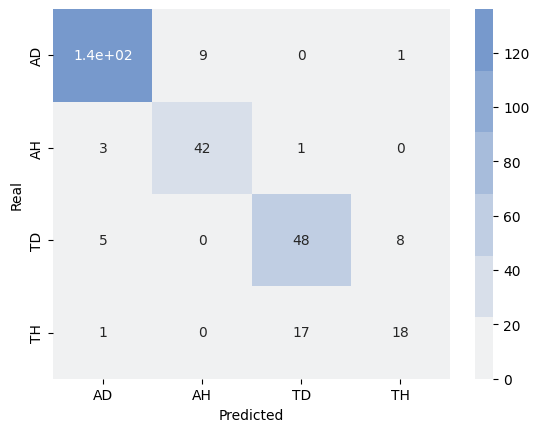

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

x_axis_labels = ['AD','AH','TD','TH']
y_axis_labels = ['AD','AH','TD','TH']

sns.heatmap(confusion_matrix(data_fin['Real'],data_fin['Pred']),annot=True,
            cmap=sns.light_palette("#79C"), xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel('Predicted')
plt.ylabel('Real')